<a href="https://colab.research.google.com/github/Nightmare125/Machine-Learning/blob/main/PCA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Implementing PCA from Scratch

Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

## Task 2.1: Manual Implementation

In [2]:
def my_pca(X, n_components=2):
    # Step 1: Center the data
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Calculate the covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort by eigenvalue in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select top n_components and project data
    components = eigenvectors[:, :n_components]
    X_projected = np.dot(X_meaned, components)
    explained_variance = eigenvalues[:n_components]

    return X_projected, components, explained_variance

## Task 2.2: Testing Your Implementation

Generate synthetic data

In [3]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 1], [1, 2]]  # Correlated features
X_synthetic = np.random.multivariate_normal(mean, cov, 300)

Apply PCA

In [4]:
X_proj, comps, var = my_pca(X_synthetic)

Visualize original data and principal components

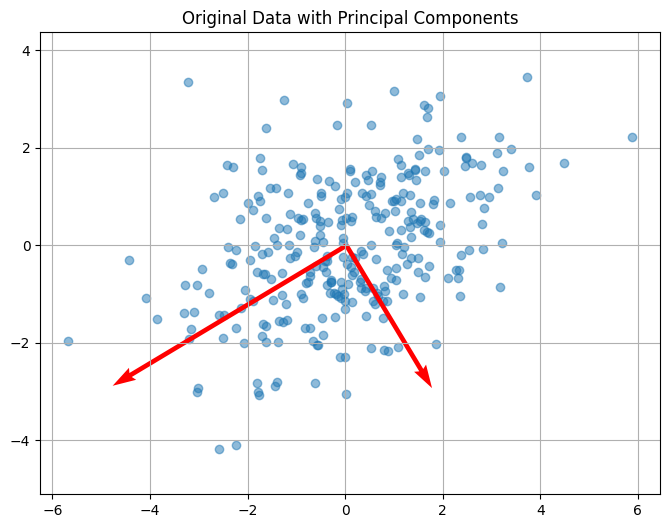

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], alpha=0.5)
origin = np.mean(X_synthetic, axis=0)
for length, vector in zip(var, comps.T):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r')
plt.title("Original Data with Principal Components")
plt.axis('equal')
plt.grid()
plt.show()

Visualize projected data

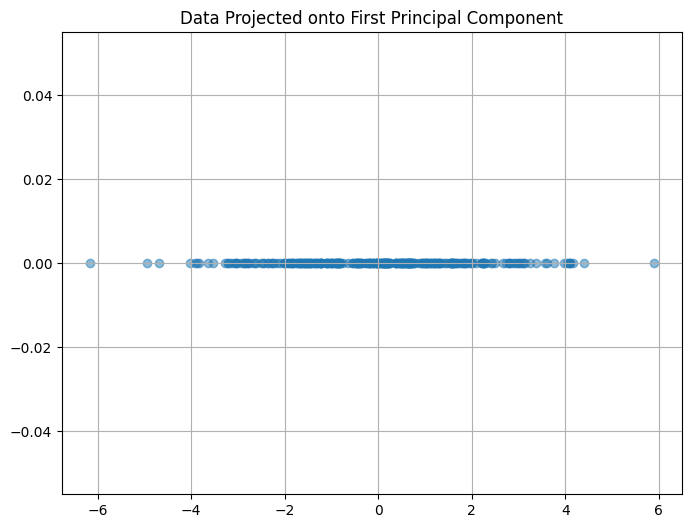

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X_proj[:, 0], np.zeros_like(X_proj[:, 0]), alpha=0.5)
plt.title("Data Projected onto First Principal Component")
plt.grid()
plt.show()

#  Part 3: PCA with scikit-learn

## Task 3.1: Iris Dataset Analysis

In [7]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

Standardize the data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)


Apply PCA

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Screen plot

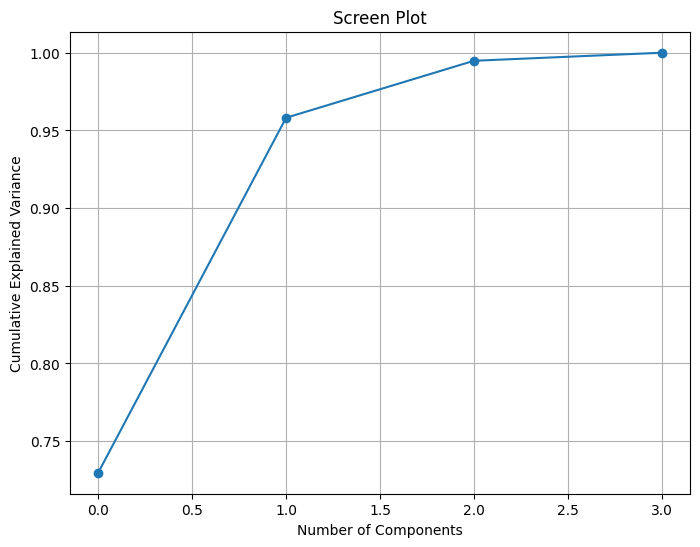

In [11]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Screen Plot')
plt.grid()
plt.show()


2D Visualization

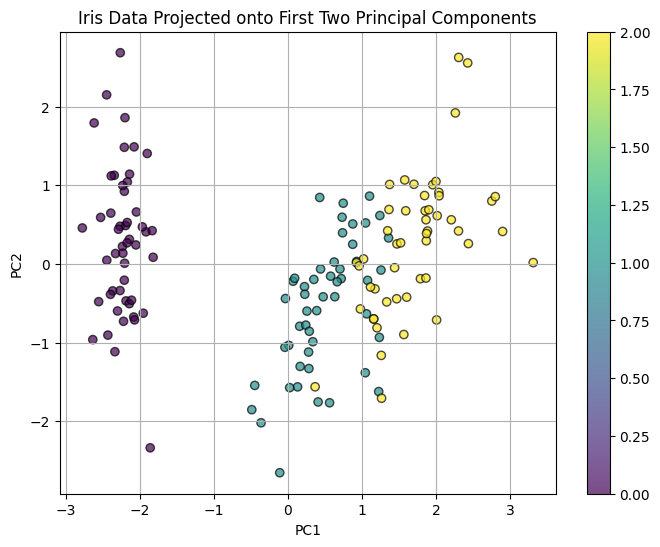

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Data Projected onto First Two Principal Components')
plt.grid()
plt.colorbar()
plt.show()